<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import seaborn as sns
import requests

from tqdm.notebook import tqdm
from urllib.parse import urlparse

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
data_name = urlparse(data_url).path.strip('/').split('/')[-1]

In [3]:
# Load the Stack Overflow survey dataset
df = pd.read_csv("survey-data_lab-12-cleaned.csv")

# Display the first few rows of the dataset
df.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceLevel,Country_Standardised,Continent,LanguageHaveWorkedWith_list
0,11,"I used to be a developer by profession, but no...",35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,20,8.0,Project manager,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,JavaScript;Python;Ruby,C#;Crystal;Java;JavaScript;Python;Ruby,JavaScript;Python;Ruby,Elasticsearch;MongoDB;PostgreSQL;SQLite,Elasticsearch;MongoDB;PostgreSQL;SQLite,Elasticsearch;MongoDB;PostgreSQL;SQLite,Amazon Web Services (AWS);Google Cloud,Google Cloud,Google Cloud,Node.js;React;Ruby on Rails,Django;Node.js;React;Ruby on Rails,Node.js;React;Ruby on Rails,NaN,NaN,NaN,NaN,NaN,NaN,Ansible;Docker;Kubernetes,Ansible;Docker;Kubernetes,Ansible;Docker;Kubernetes,Visual Studio Code,Visual Studio Code,Visual Studio Code,Windows;Windows Subsystem for Linux (WSL),Windows,Confluence;GitHub Discussions;Jira;Smartsheet,Confluence;GitHub Discussions;Jira,Confluence;GitHub Discussions;Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Microsoft Teams;Slack;Zoom,ChatGPT;GitHub Copilot;Google Gemini;Meta AI;V...,GitHub Copilot;Google Gemini;Visual Studio Int...,GitHub Copilot;Google Gemini;Visual Studio Int...,Stack Overflow for Teams (private knowledge sh...,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, definitely",Yes,Favorable,Increase productivity;Speed up learning;Improv...,Somewhat distrust,Neither good or bad at handling complex tasks,Learning about a codebase;Writing code;Documen...,Project planning;Testing code;Generating conte...,Committing and reviewing code;Deployment and m...,NaN,NaN,Learning about a codebase;Writing code;Documen...,NaN,NaN,No,Circulating misinformation or disinformation;M...,Don’t trust the output or answers;AI tools lac...,Yes,Individual contributor,15.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Strongly agr

### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
df.dtypes

ResponseId                          int64
MainBranch                         object
Age                                object
Employment                         object
RemoteWork                         object
Check                              object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
TechDoc                            object
YearsCode                          object
YearsCodePro                      float64
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
BuildvsBuy                         object
TechEndorse                        object
Country                            object
Currency                           object
CompTotal                         float64
LanguageHaveWorkedWith             object
LanguageWantToWorkWith            

In [5]:
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceLevel,Country_Standardised,Continent,LanguageHaveWorkedWith_list
count,29126.000000,29126,29126,29126,29126,29126,29118,29126,29088,24202,21047,29066,29126.000000,29085,28170,28162,27221,26454,26829,29126,28228,2.235700e+04,28997,27580,25510,25543,22397,20461,22228,18634,17055,23139,20383,18652,10295,8348,8001,20231,17386,15689,26943,24254,23267,28764,26580,25984,28829,27455,26202,21810,20818,28431,24523,23408,22652,19051,18457,29126,28998,29003,23388,28882,28980,29126,22319,18009,18215,18134,17572,15859,12484,6805,6357,12589,1051,513,22320,21259,20152,29126,29028,28979.000000,28355,27775,27860,27817,27681,27669,27589,27576,27454,28194,28188,27560,28704,28656,28124,27688,28391,28708,28750,28888.000000,28957.000000,28975.000000,29014.000000,29012.000000,29020.000000,29020.000000,29014.000000,29009.000000,28720,28752,1.607500e+04,29126.000000,29126,29126,29126,28997
unique,NaN,5,8,64,3,1,108,8,378,7175,103,52,NaN,34,10,3,207,3,370,166,125,NaN,12767,12557,7116,6011,5626,2865,3412,3042,1704,7575,7227,3600,1083,966,711,5382,6113,2996,12172,10462,7660,8255,6094,4819,1689,1391,4360,2837,2015,3479,2284,1851,1615,1454,899,31,5,3,6,103,6,3,6,104,5,5,992,1639,1174,531,386,676,150,160,3,123,226,1,2,NaN,5,5,5,5,5,5,5,5,5,5,5,5,5,5,953,514,3,9,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN,4,165,6,12767
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,10,NaN,"Developer, full-stack",20 to 99 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Reputation for quality and ...,United States of America,EUR European Euro,NaN,HTML/CSS;JavaScript;TypeScript,Rust,Python,PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS),Amazon Web Services (AWS),Amazon Web Services (AWS),Spring Boot,Spring Boot,Spring Boot,Rasberry Pi,Rasberry Pi,Rasberry Pi,.NET (5+) ;.NET Framework (1.0 - 4.8),.NET (5

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [6]:
missing = df.copy().isna()
missing_stats=missing.sum().sort_values(ascending=False).to_frame(name='count')
missing_stats['Missing (%)'] = (missing_stats['count'] / len(df) * 100).round(3)
missing_stats

,count,Missing (%)
AINextMuch less integrated,28613,98.239
AINextLess integrated,28075,96.392
AINextNo change,22769,78.174
AINextMuch more integrated,22321,76.636
EmbeddedAdmired,21125,72.530
EmbeddedWantToWorkWith,20778,71.338
EmbeddedHaveWorkedWith,18831,64.654
AIToolNot interested in Using,16642,57.138
AINextMore integrated,16537,56.777
MiscTechAdmired,13437,46.134


In [7]:
# Get all columns that are 75% and above complete
cols = missing_stats.loc[missing_stats.loc[:, 'Missing (%)'] <= 25, :].index.values

df_clean = df.loc[:, cols]

In [8]:
# Impute remaining columns
df_clean.dtypes

PlatformHaveWorkedWith             object
AISent                             object
AIThreat                           object
CompTotal                         float64
DatabaseWantToWorkWith             object
AISearchDevHaveWorkedWith          object
WebframeHaveWorkedWith             object
ToolsTechAdmired                   object
SOPartFreq                         object
OfficeStackSyncAdmired             object
LearnCodeOnline                    object
ToolsTechWantToWorkWith            object
OfficeStackSyncWantToWorkWith      object
LanguageAdmired                    object
DatabaseHaveWorkedWith             object
NEWCollabToolsAdmired              object
OfficeStackAsyncHaveWorkedWith     object
BuildvsBuy                         object
NEWCollabToolsWantToWorkWith       object
TechEndorse                        object
ToolsTechHaveWorkedWith            object
BuyNewTool                         object
Knowledge_9                        object
OpSysProfessional use             

In [9]:
def impute_column(col):
    if pd.api.types.is_numeric_dtype(col):
        return col.fillna(col.median(skipna=True))
    elif col.dtype == 'O' or pd.api.types.is_categorical_dtype(col):
        mode_val = col.mode(dropna=True)
        
        return col.fillna(mode_val.iloc[0] if not mode_val.empty else col)
    else:
        
        return col

df_clean = df_clean.apply(impute_column)

In [10]:
len(df_clean)

29126

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [11]:
df_clean['Employment'].value_counts().to_frame(name='count')

,count
Employment,
"Employed, full-time",22537
"Employed, full-time;Independent contractor, freelancer, or self-employed",2291
"Independent contractor, freelancer, or self-employed",1245
"Employed, part-time",534
"Employed, full-time;Student, part-time",509
"Student, full-time;Employed, part-time",410
"Employed, full-time;Student, full-time",400
"Student, part-time;Employed, part-time",254
"Independent contractor, freelancer, or self-employed;Employed, part-time",199


In [12]:
df_clean['JobSat'].value_counts().to_frame(name='count')

,count
JobSat,
8.0,7509
7.0,6379
6.0,3751
9.0,3626
10.0,2251
5.0,1956
3.0,1165
4.0,1130
2.0,772


In [13]:
df_clean['YearsCodePro'].value_counts().to_frame(name='count')

,count
YearsCodePro,
8.0,2358
3.0,2261
2.0,2153
5.0,2016
10.0,1918
4.0,1866
6.0,1725
7.0,1533
1.0,1173


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


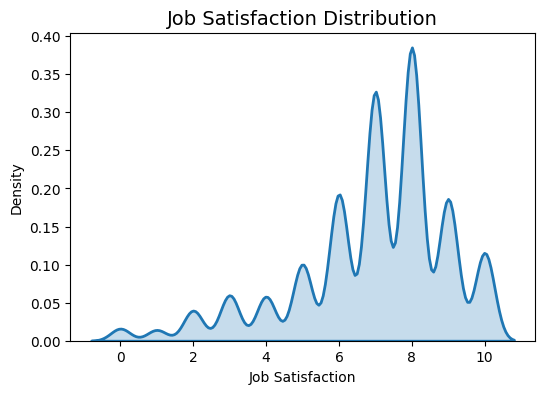

In [14]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df_clean, x='JobSat', fill=True, linewidth=2)

plt.title("Job Satisfaction Distribution", fontsize=14)
plt.xlabel("Job Satisfaction")
plt.ylabel("Density")

plt.savefig('Lab 13 - Step 5 (KDE Plot)')
plt.show()

#### Data Interpretation

The data shows primary concentration at the higher end, the tallest peak sitting at satisfaction of 8, suggesting that respondents substantially report being satisfied with their job.

Noticeable, around 6 and 7, there are further significant groups of respondents that are moderately satisfied with their jobs. In contrast, those at the lower end of satisfaction score remains at a low density, suggesting not many are dissatisfied with their jobs.

In general, the plot skews left, showing that majority of respondents are satisfied with their occupation.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [15]:
# Creating column of lists for languages in LanguageHaveWorkedWith
df_clean['LanguageWantToWorkWith_list'] = df_clean['LanguageWantToWorkWith'].str.split(';')
count_want = df_clean['LanguageWantToWorkWith_list'].explode().value_counts()
count_want

LanguageWantToWorkWith_list
Python                     12056
SQL                        11884
JavaScript                 11775
TypeScript                 10909
Rust                       10367
HTML/CSS                   10239
Go                          7457
Bash/Shell (all shells)     7117
C#                          6859
Java                        5168
C++                         4573
Kotlin                      3812
C                           3310
PHP                         2708
PowerShell                  2322
Swift                       1926
Dart                        1749
Zig                         1732
Elixir                      1581
Ruby                        1433
Lua                         1419
Assembly                    1072
Scala                        979
Haskell                      976
R                            925
F#                           730
Clojure                      693
GDScript                     665
Erlang                       586
Lisp           

In [16]:
df_clean['LanguageHaveWorkedWith_list'] = df_clean['LanguageHaveWorkedWith'].str.split(';')
count_have = df_clean['LanguageHaveWorkedWith_list'].explode().value_counts()
count_have

LanguageHaveWorkedWith_list
JavaScript                 18609
SQL                        16104
HTML/CSS                   15500
Python                     14289
TypeScript                 12688
Bash/Shell (all shells)    10687
Java                        8734
C#                          8571
C++                         5809
PHP                         5288
C                           4876
PowerShell                  4466
Go                          4350
Rust                        3514
Kotlin                      2914
Ruby                        1746
Dart                        1671
Lua                         1543
Swift                       1405
Visual Basic (.Net)         1189
Groovy                      1169
Assembly                    1150
R                           1058
VBA                         1020
MATLAB                       940
Scala                        844
Perl                         708
Elixir                       673
Objective-C                  653
GDScript       

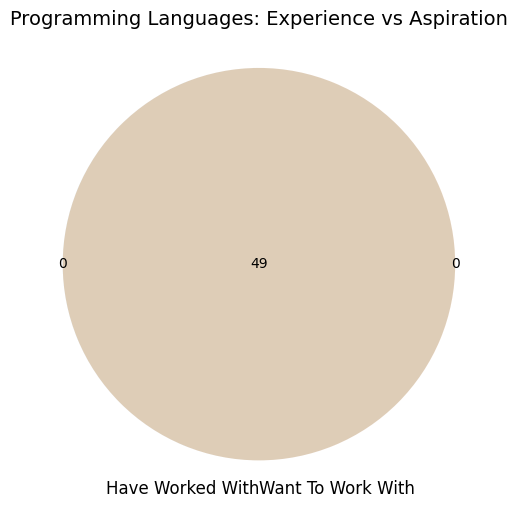

In [17]:
# Get sets of languages
langs_have = set(count_have.index)
langs_want = set(count_want.index)

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn2(
    subsets=(langs_have, langs_want),
    set_labels=('Have Worked With', 'Want To Work With'),
    set_colors=('#1f77b4', '#ff7f0e'),
    alpha=0.6
)

plt.title('Programming Languages: Experience vs Aspiration', fontsize=14)
plt.show()

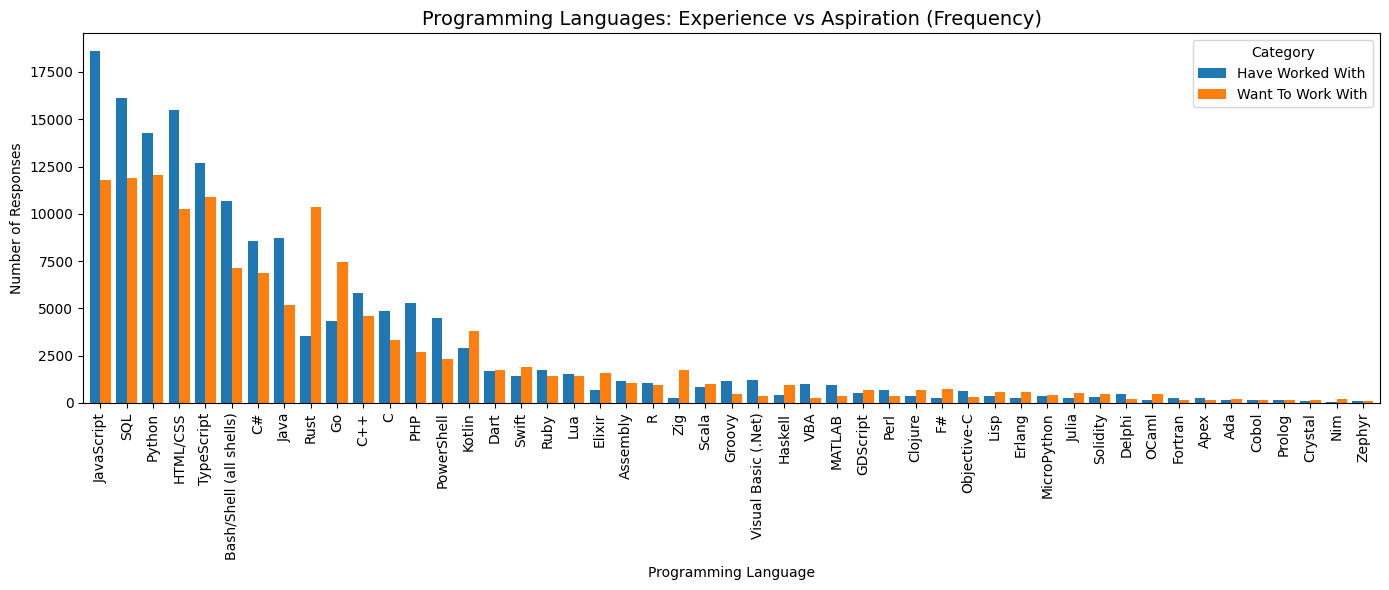

In [18]:
# Combine counts into one DataFrame
df_counts = pd.DataFrame({
    'Have Worked With': count_have,
    'Want To Work With': count_want
}).fillna(0).astype(int)

# Sort by total frequency to keep chart readable
df_counts['Total'] = df_counts['Have Worked With'] + df_counts['Want To Work With']
df_counts = df_counts.sort_values('Total', ascending=False).drop(columns='Total')

# Plot
ax = df_counts.plot(
    kind='bar',
    figsize=(14, 6),
    width=0.8,
)

plt.title('Programming Languages: Experience vs Aspiration (Frequency)', fontsize=14)
plt.ylabel('Number of Responses')
plt.xlabel('Programming Language')
plt.xticks(rotation=90)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [19]:
remote_by_region = df_clean.groupby(["Continent", "RemoteWork"])['RemoteWork'].count().reset_index(name='Count')
remote_by_region

,Continent,RemoteWork,Count
0,Africa,"Hybrid (some remote, some in-person)",298
1,Africa,In-person,197
2,Africa,Remote,261
3,America,"Hybrid (some remote, some in-person)",2697
4,America,In-person,1138
5,America,Remote,4403
6,Asia,"Hybrid (some remote, some in-person)",1942
7,Asia,In-person,1830
8,Asia,Remote,1209
9,Europe,"Hybrid (some remote, some in-person)",7270


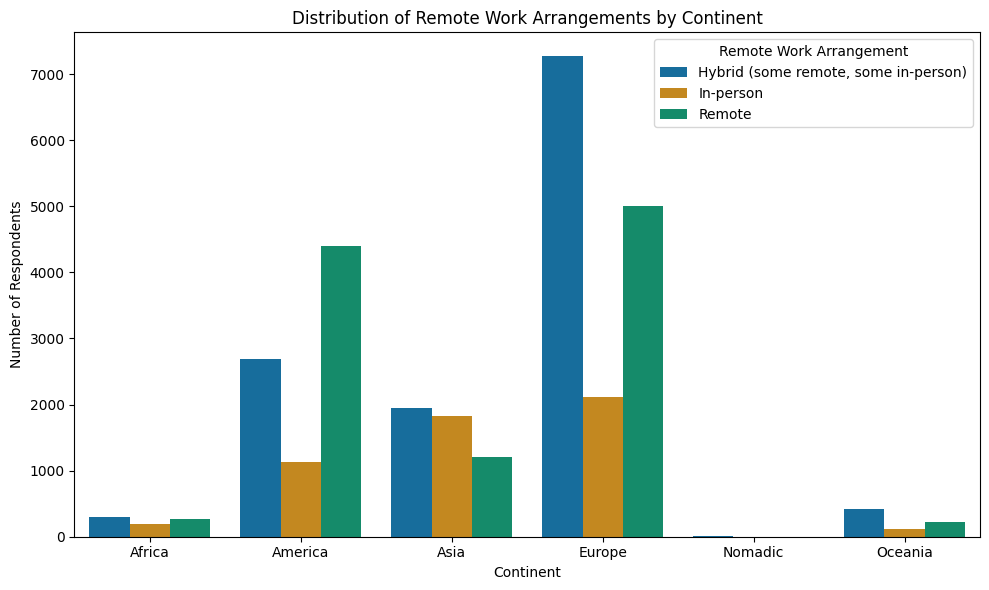

In [20]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=remote_by_region,
    x='Continent', 
    y='Count',
    hue='RemoteWork',
    palette='colorblind'
)

plt.title('Distribution of Remote Work Arrangements by Continent')
plt.ylabel('Number of Respondents')
plt.xlabel('Continent')
plt.legend(title='Remote Work Arrangement', loc='upper right')
plt.tight_layout()

plt.savefig("Lab 13 - Step 7")
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


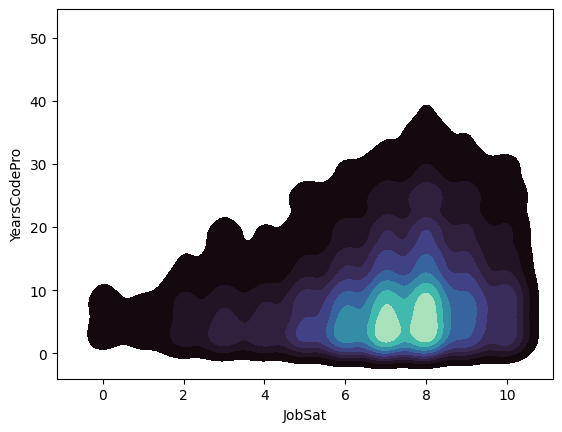

,JobSat,YearsCodePro
JobSat,1.000000,0.103898
YearsCodePro,0.103898,1.000000


In [21]:
sat_by_experience = df_clean[["JobSat", "YearsCodePro"]]
sns.kdeplot(
    data=sat_by_experience, x="JobSat", y="YearsCodePro", fill=True, cmap="mako"
)

plt.savefig("Lab 13 - Step 8 KDEplot")
plt.show()

corr=sat_by_experience.corr()
corr

#### Key observations from the contours
- Peak density zone — The darkest region clusters around $\text{JobSat} ≈ 7–8$ and $\text{YearsCodePro} ≈ 10–20$ years.
This suggests that mid‑ to late‑career developers tend to report relatively high job satisfaction.
- Spread of satisfaction — For those with fewer than ~5 years of professional experience, job satisfaction scores are more widely scattered across the whole 0–10 range. That variability may reflect early‑career exploration or job instability.
- Plateau effect — Beyond ~ 20 – 25 years of coding professionally, the density thins and spreads horizontally. This can mean that while some very experienced developers are still highly satisfied, others dip lower — the correlation you calculated earlier (~0.10) captures that the overall upward trend isn’t strong.
- Low‑density extremes — Very low JobSat scores are relatively rare at any experience level, but they do appear sporadically — indicating pockets of dissatisfaction that aren’t tied strictly to coding tenure.


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [22]:
def map_employment(val):
    s = str(val)
    if "Employed, full-time" in s:
        return "Employed, full-time"
    elif "Employed, part-time" in s:
        return "Employed, part-time"
    elif "Not employed" in s:
        return "Not employed"
    elif "Independent contractor" in s:
        return "Independent contractor"
    else:
        print(val)
        return "Other"  # or "Other" if you want a catch-all

df_clean['EmploymentSimple'] = df_clean['Employment'].apply(map_employment)
df_clean['EmploymentSimple'].value_counts()

EmploymentSimple
Employed, full-time       26231
Employed, part-time        1509
Independent contractor     1321
Not employed                 65
Name: count, dtype: int64

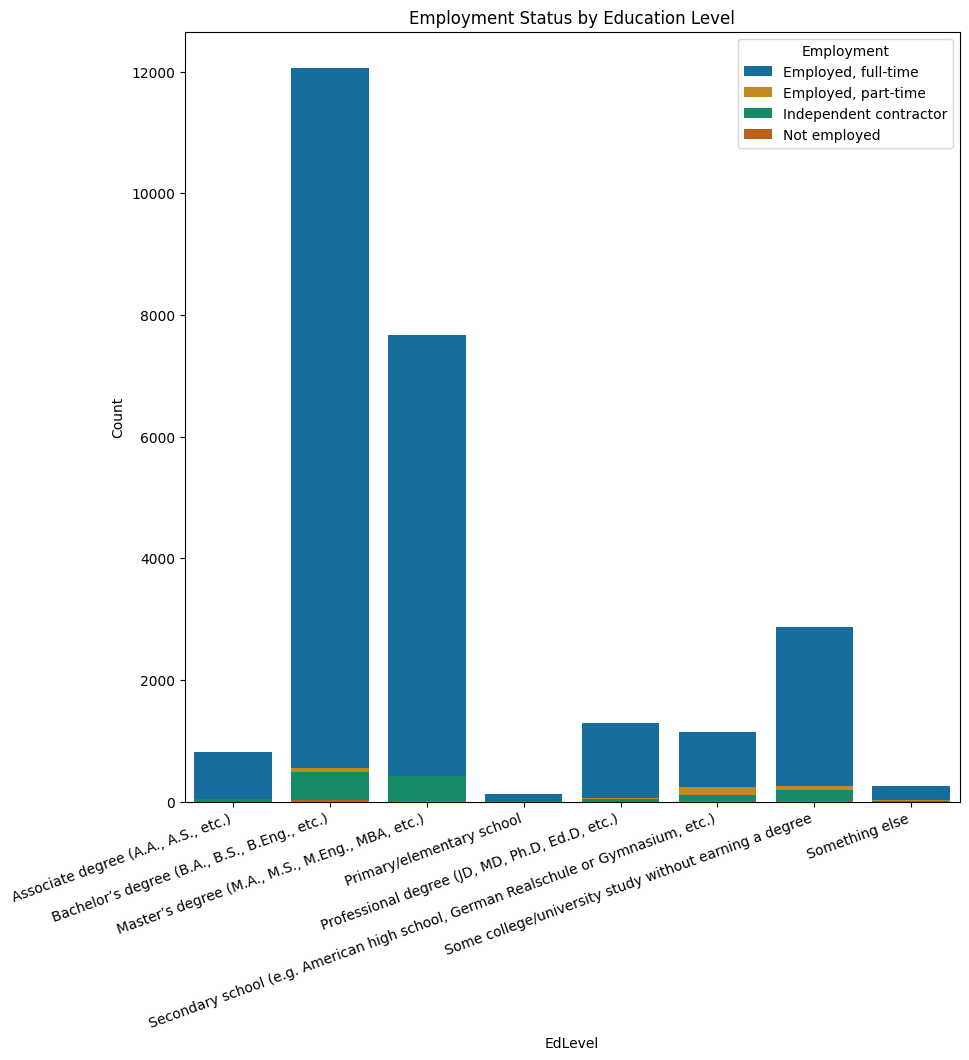

In [23]:
ct = pd.crosstab(df_clean['EdLevel'], df_clean['EmploymentSimple'])

# 2. Reshape to long form for seaborn
ct_long = ct.reset_index().melt(id_vars='EdLevel', var_name='EmploymentSimple', value_name='Count')

plt.figure(figsize=(10, 10))
ax = sns.barplot(
    data=ct_long,
    x='EdLevel', y='Count',
    hue='EmploymentSimple',
    dodge=False,   # <— key: bars stack
    palette='colorblind'
)

# 4. Beautify
plt.xticks(rotation=20, ha='right')
plt.title('Employment Status by Education Level')
plt.ylabel('Count')
plt.legend(title='Employment', loc='best')
plt.show()


### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [25]:
df_clean.to_csv("survey-data_lab-13-cleaned.csv", index=None)

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
